In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Read in the file
file = Path("../Data/us_videos_cleaned_2.csv")
us_videos_df = pd.read_csv(file)
us_videos_df.head()

video_id         publish_time trending_date  publish_to_trend  \
0  2kyS6SvSYSE  2017-11-13 17:13:01    2017-11-14                 0   
1  1ZAPwfrtAFY  2017-11-13 07:30:00    2017-11-14                 0   
2  5qpjK5DgCt4  2017-11-12 19:05:24    2017-11-14                 1   
3  puqaWrEC7tY  2017-11-13 11:00:04    2017-11-14                 0   
4  d380meD0W0M  2017-11-12 18:01:41    2017-11-14                 1   

   days_trending                                              title  \
0              7                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1              7  The Trump Presidency: Last Week Tonight with J...   
2              7  Racist Superman | Rudy Mancuso, King Bach & Le...   
3              7                   Nickelback Lyrics: Real or Fake?   
4              6                           I Dare You: GOING BALD!?   

           channel_title  category_id   category_name  \
0           CaseyNeistat           22  People & Blogs   
1        LastWeekTonight           24   Entertainment   
2           Rudy Mancuso           23          Comedy   
3  Good Mythical Morning           24   Entertainment   
4               nigahiga           24   Entertainment   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      2966          15954              False             False   
1      6146          12703              False             False   
2      5339           8181              False             False   
3       666           2146              False             False   
4      1989          17518              False             False   

   video_error_or_removed  tags_count  
0                   False           1  
1                   False           4  
2                   False          23  
3                   False          27  
4                   False          14

<AxesSubplot:>

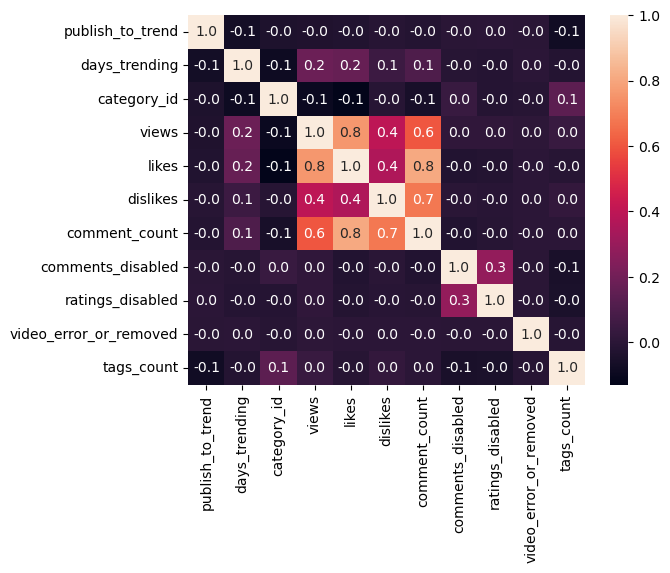

In [3]:
# Use seaborn to create heatmap for correlations between features

sns.heatmap(us_videos_df.corr(), annot=True, fmt=".1f")

In [9]:
# Set up featuer variables and target variable
X = us_videos_df.drop(columns = ['video_id', 
                        'publish_time',
                        'publish_to_trend',
                        'trending_date', 
                        'days_trending', 
                        'category_name', 
                        'tags', 
                        'comments_disabled',
                        'ratings_disabled',
                        'video_error_or_removed'])
y = us_videos_df['publish_to_trend']

In [10]:
X

title  \
0                    WE WANT TO TALK ABOUT OUR MARRIAGE   
1     The Trump Presidency: Last Week Tonight with J...   
2     Racist Superman | Rudy Mancuso, King Bach & Le...   
3                      Nickelback Lyrics: Real or Fake?   
4                              I Dare You: GOING BALD!?   
...                                                 ...   
6346                      CRAYOLA MAKEUP | HIT OR MISS?   
6347  First Take reacts: Kyrie Irving says contract ...   
6348  Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs   
6349  Carla Makes BA Smashburgers | From the Test Ki...   
6350  Katherine Langford on 13 Reasons Why, Australi...   

                             channel_title  category_id    views   likes  \
0                             CaseyNeistat           22   748374   57527   
1                          LastWeekTonight           24  2418783   97185   
2                             Rudy Mancuso           23  3191434  146033   
3                    Good Mythical Morning           24   343168   10172   
4                                 nigahiga           24  2095731  132235   
...                                    ...          ...      ...     ...   
6346                             Laura Lee           26   607422   26166   
6347                                  ESPN           17   812832    7701   
6348  The Late Late Show with James Corden           24   864189   18811   
6349                           Bon Appétit           26   540149   14206   
6350                     Jimmy Kimmel Live           24   296295    8157   

      dislikes  comment_count  tags_count  
0         2966          15954           1  
1         6146          12703           4  
2         5339           8181          23  
3          666           2146          27  
4         1989          17518          14  
...        ...            ...         ...  
6346       895           3517          21  
6347       320           2505          31  
6348       399           1074          28  
6349       693           1211          26  
6350       294            764          25  

[6351 rows x 8 columns]

In [15]:
# set up LabelEncoder instance
le = LabelEncoder()

X['title'] = le.fit_transform(X['title'])
X['channel_title'] = le.fit_transform(X['channel_title'])

X

title  channel_title  category_id    views   likes  dislikes  \
0      5749            332           22   748374   57527      2966   
1      5332           1002           24  2418783   97185      6146   
2      4285           1493           23  3191434  146033      5339   
3      3903            701           24   343168   10172       666   
4      2500           2139           24  2095731  132235      1989   
...     ...            ...          ...      ...     ...       ...   
6346    919           1007           26   607422   26166       895   
6347   1840            551           17   812832    7701       320   
6348   1526           1745           24   864189   18811       399   
6349   1004            230           26   540149   14206       693   
6350   3066            884           24   296295    8157       294   

      comment_count  tags_count  channe_title  
0             15954           1           332  
1             12703           4          1002  
2              8181          23          1493  
3              2146          27           701  
4             17518          14          2139  
...             ...         ...           ...  
6346           3517          21          1007  
6347           2505          31           551  
6348           1074          28          1745  
6349           1211          26           230  
6350            764          25           884  

[6351 rows x 9 columns]

In [16]:
# Set up StandardScaler instance
scaler = StandardScaler()

# Scale the data
X = scaler.fit_transform(X)

X

array([[ 1.4082439 , -1.24658577,  0.215712  , ...,  0.53369409,
        -1.54865379, -1.24658577],
       [ 1.18041289, -0.17832447,  0.49300922, ...,  0.3821926 ,
        -1.30222208, -0.17832447],
       [ 0.60837676,  0.60453567,  0.35436061, ...,  0.17146058,
         0.25851208,  0.60453567],
       ...,
       [-0.89902312,  1.00632947,  0.49300922, ..., -0.15973632,
         0.66923159,  1.00632947],
       [-1.18422165, -1.4092166 ,  0.77030644, ..., -0.15335192,
         0.50494378, -1.4092166 ],
       [-0.05763283, -0.36646602,  0.49300922, ..., -0.17418279,
         0.42279988, -0.36646602]])

In [17]:
# instantiate model
model = LinearRegression()

In [18]:
# Split the dataset into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# make prediction
y_pred = model.predict(X_test)
print(y_pred)

[34.97119407 22.59619407 40.84619407 ... 14.59619407  1.15869407
 43.09619407]


In [21]:
print(model.coef_)
print(model.intercept_)

[ 2.64807045e+00  1.26735250e+15 -8.55468750e+00 -2.92187500e+00
 -7.40625000e+00  3.59375000e-01  1.21289062e+00 -1.33593750e+01
 -1.26735250e+15]
21.346194071652583


In [22]:
# print out r2score
r2_score(y_test, y_pred)

0.015069407939575896